<a href="https://colab.research.google.com/github/adalbertii/21.04.2023-python-notebooks-package/blob/main/simple_linear_regression_one_neuron_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Construction of neural networks with **one neuron** - **regresion model** case



**Developed by** Wojciech Michalski

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Loading the Required Libraries and Modules**

In [61]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Creation of sample data**

In [72]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  14.6, 8.2, 15.8, 13.5, 21.4, 25.8, 32.9, 28.0, 33.8, 38.2])

**Create a chart for the prepared dataset**

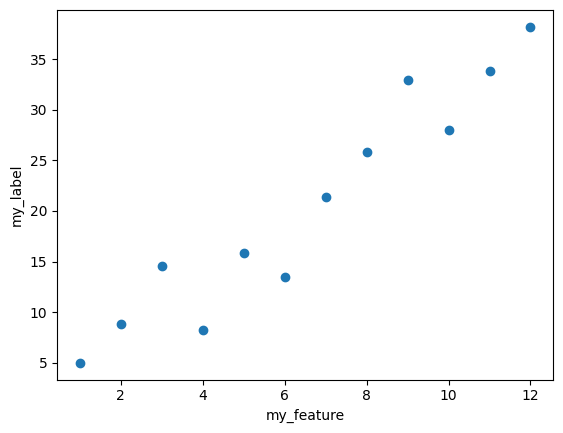

In [73]:
plt.xlabel("my_feature")
plt.ylabel("my_label")

plt.scatter(my_feature, my_label)

**Model building**

In [63]:
#--->  setting the initial  hyperparameters of the neural model

learning_rate=0.01
epochs=10
my_batch_size=12

In [64]:
#--->  model definition

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

**Model compilation**

In [65]:
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model training**

In [66]:

history = model.fit(x=my_feature, y=my_label, batch_size=my_batch_size, epochs=epochs)

Epoch 1/10
1/1 [==============================] - 0s 277ms/step - loss: 234.0747 - root_mean_squared_error: 15.2995
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 226.3186 - root_mean_squared_error: 15.0439
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 220.8232 - root_mean_squared_error: 14.8601
Epoch 4/10
1/1 [==============================] - 1s 839ms/step - loss: 216.2991 - root_mean_squared_error: 14.7071
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 212.3393 - root_mean_squared_error: 14.5719
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 208.7556 - root_mean_squared_error: 14.4484
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 205.4433 - root_mean_squared_error: 14.3333
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 202.3375 - root_mean_squared_error: 14.2245
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 199.3948 

**Create a chart for the:**


*   prepared dataset
*   straight line approximating
*   loss chart

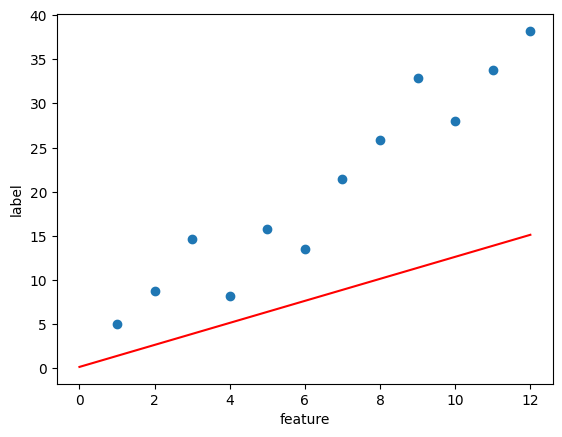

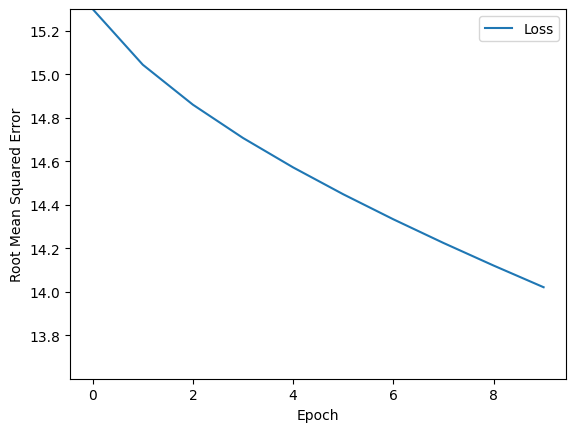

In [80]:
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]
plt.xlabel("feature")
plt.ylabel("label")


plt.scatter(my_feature, my_label)

x0 = 0
y0 = trained_bias
x1 = my_feature[-1]
y1 = trained_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')


plt.show()

"""Plot the loss curve, which shows loss vs. epoch."""

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

plt.plot(epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min()*0.97, rmse.max()])
plt.show()

**The trained values of the coefficient [w] and [bias] are as follows:**

In [81]:
print(" W =", str(model.get_weights()[0]), "  bias =", str(model.get_weights()[1]))

 W = [[1.2462081]]   bias = [0.17041652]


In [ ]:
print("learning rate :", learning_rate)
print("epochs        :", epochs)
print("batch size    :", my_batch_size)
print("--------------------------------------------")
print("Learning result:")
print("weight        :", model.get_weights()[0])
print("bias          :", model.get_weights()[1])

**Conclusions:**

The initial values of the model's hyperparameters do not provide a valid approximation  

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++





**Optimization of the learning process**

In [86]:
# --->  we increase the number of epochs

learning_rate=0.01
epochs=450
my_batch_size=12

In [87]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))


model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

history = model.fit(x=my_feature, y=my_label, batch_size=my_batch_size, epochs=epochs)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/450
1/1 [==============================] - 2s 2s/step - loss: 952.5959 - root_mean_squared_error: 30.8642
Epoch 2/450
1/1 [==============================] - 0s 12ms/step - loss: 936.6392 - root_mean_squared_error: 30.6046
Epoch 3/450
1/1 [==============================] - 0s 12ms/step - loss: 925.1948 - root_mean_squared_error: 30.4170
Epoch 4/450
1/1 [==============================] - 0s 14ms/step - loss: 915.6901 - root_mean_squared_error: 30.2604
Epoch 5/450
1/1 [==============================] - 0s 11ms/step - loss: 907.3098 - root_me

**We create the graph after the optimization of hyperparameters of the model**

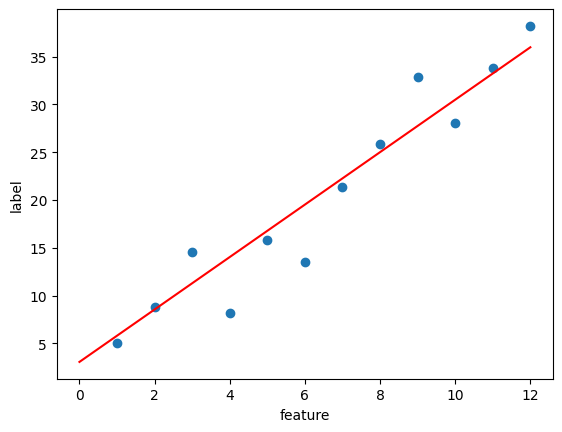

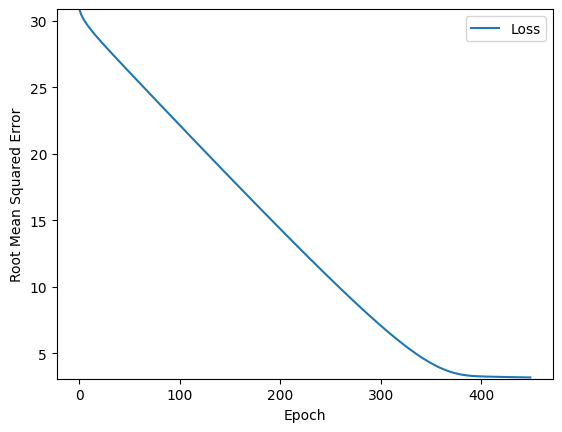

In [88]:
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
plt.xlabel("feature")
plt.ylabel("label")
plt.scatter(my_feature, my_label)
x0 = 0
y0 = trained_bias
x1 = my_feature[-1]
y1 = trained_bias + (trained_weight * x1)
plt.plot([x0, x1], [y0, y1], c='r')
plt.show()

"""Plot the loss curve, which shows loss vs. epoch."""
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")

plt.plot(epochs, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min()*0.97, rmse.max()])
plt.show()

In [36]:
print("learning rate :", learning_rate)
print("epochs        :", epo)
print("batch size    :", my_batch_size)
print("--------------------------------------------")
print("Learning result:")
print("weight        :", model.get_weights()[0])
print("bias          :", model.get_weights()[1])

learning rate : 0.05
epochs        : 25
batch size    : 1
--------------------------------------------
Learning result:
weight        : [[2.6887007]]
bias          : [3.048687]


------------------------------------------------------------------------------

**Prediction process for user-entered values of new features**

In [89]:
feature_x = float(input('Give the value of the feature :') )

Give the value of the feature :2.1


In [92]:
prediction = model.predict([feature_x])
print()
print('--------------------------------------------------------------------------')
print('Prediction result')
print()
print('For the fuature value: ',feature_x, ' the prediction value is as follows : ', str(prediction) )

1/1 [==============================] - 0s 44ms/step

--------------------------------------------------------------------------
Prediction result

For the fuature value:  2.1  the prediction value is as follows :  [[8.816036]]
